In [299]:
# Importing Packages
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [300]:
df=pd.read_csv("Iris.csv")

In [301]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


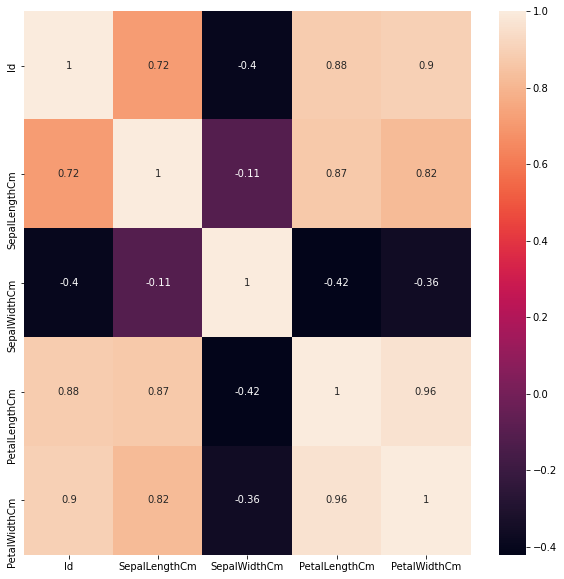

In [303]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

In [304]:
x=df.iloc[:,1:5]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [305]:
from sklearn.preprocessing import LabelEncoder

In [306]:
le = LabelEncoder()

In [307]:
le.fit(df['Species'])

LabelEncoder()

In [308]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [309]:
df['Species']=le.transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [310]:
y=df.iloc[:,5]
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int64

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#**First Model**

###using neurones in input layer 10 and in hidden layer 50
###using optimizer sgd
###using activation function relu in input and hidden layer

In [313]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [314]:
model=Sequential()

In [315]:
model.add(Dense(10,activation='relu',input_shape=(4,)))

In [316]:
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))

In [317]:
model.add(Dense(3,activation='softmax'))

In [318]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [319]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 59ms/step - loss: 1.1305 - accuracy: 0.5429 - val_loss: 1.1183 - val_accuracy: 0.5333
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 1.0562 - accuracy: 0.4095 - val_loss: 1.0378 - val_accuracy: 0.5111
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9708 - accuracy: 0.4667 - val_loss: 0.9519 - val_accuracy: 0.4889
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9079 - accuracy: 0.6000 - val_loss: 0.8828 - val_accuracy: 0.8444
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.8529 - accuracy: 0.7905 - val_loss: 0.8104 - val_accuracy: 0.9111
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 0.8002 - accuracy: 0.9143 - val_loss: 0.7403 - val_accuracy: 0.8222
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.7606 - accuracy: 0.7333 - val_loss: 0.6827 - val_accuracy: 0.8889
Epoch 8/50
4/4 [===============

In [320]:
loss=pd.DataFrame(model.history.history)

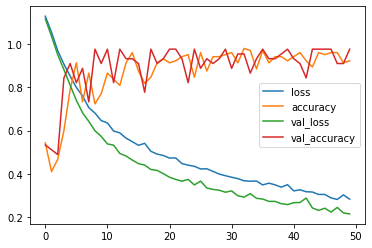

In [321]:
loss.plot()

In [322]:
y_predict=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [323]:
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [324]:
from sklearn.metrics import confusion_matrix

In [325]:
cm=confusion_matrix(y_predict,y_test)

In [326]:
cm

array([[19,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 13]])

# **Second Model**

### change neurones in input layer to 15 and in hidden layer to 20 
###change optimizer to adam 
###change activation function to tanh

In [327]:
model2=Sequential()

In [328]:
model2.add(Dense(15,activation='tanh',input_shape=(4,)))

In [329]:
model2.add(Dense(20,activation='tanh'))
model2.add(Dense(20,activation='tanh'))

In [330]:
model2.add(Dense(3,activation='softmax'))

In [331]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [332]:
model2.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 56ms/step - loss: 1.1112 - accuracy: 0.6286 - val_loss: 1.0510 - val_accuracy: 0.7111
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0465 - accuracy: 0.6476 - val_loss: 1.0312 - val_accuracy: 0.2889
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0105 - accuracy: 0.3905 - val_loss: 1.0229 - val_accuracy: 0.3778
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9856 - accuracy: 0.5619 - val_loss: 0.9952 - val_accuracy: 0.5333
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.9611 - accuracy: 0.6667 - val_loss: 0.9607 - val_accuracy: 0.5778
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9312 - accuracy: 0.6571 - val_loss: 0.9221 - val_accuracy: 0.3778
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.9014 - accuracy: 0.5048 - val_loss: 0.8858 - val_accuracy: 0.6444
Epoch 8/100
4/4 [=====

In [333]:
loss2=pd.DataFrame(model2.history.history)

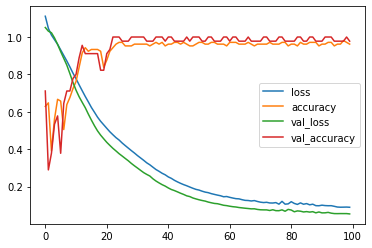

In [334]:
loss2.plot()

In [335]:
y_predict2=model2.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [336]:
y_predict2

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [337]:
cm2=confusion_matrix(y_predict2,y_test)

In [338]:
cm2

array([[19,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 13]])

#**Third Model**

###change neurones in input layer to 20 and in hidden layer to 10
###change activation function to sigmoid




In [339]:
model3=Sequential()

In [340]:
model3.add(Dense(20,activation='sigmoid',input_shape=(4,)))

In [341]:
model3.add(Dense(10,activation='sigmoid'))
model3.add(Dense(10,activation='sigmoid'))

In [342]:
model3.add(Dense(3,activation='softmax'))

In [343]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [344]:
model3.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 54ms/step - loss: 1.1344 - accuracy: 0.2952 - val_loss: 1.0845 - val_accuracy: 0.4222
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1267 - accuracy: 0.2952 - val_loss: 1.0846 - val_accuracy: 0.4222
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 1.1222 - accuracy: 0.2952 - val_loss: 1.0854 - val_accuracy: 0.4222
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1168 - accuracy: 0.2952 - val_loss: 1.0866 - val_accuracy: 0.4222
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 1.1121 - accuracy: 0.2952 - val_loss: 1.0879 - val_accuracy: 0.4222
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1087 - accuracy: 0.2952 - val_loss: 1.0895 - val_accuracy: 0.4222
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1050 - accuracy: 0.2952 - val_loss: 1.0911 - val_accuracy: 0.4222
Epoch 8/100
4/4 [========

In [345]:
loss3=pd.DataFrame(model3.history.history)

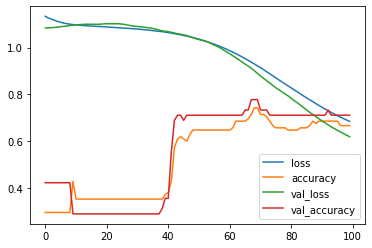

In [346]:
loss3.plot()

In [347]:
y_predict3=model3.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [348]:
y_predict3

array([2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       0])

In [349]:
cm3=confusion_matrix(y_predict3,y_test)

In [350]:
cm3

array([[19,  0,  0],
       [ 0,  0,  0],
       [ 0, 13, 13]])